# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
short_cities = ['paris', 'minneapolis', 'new york']

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
    
def convert_k_to_f(ktemp):
    return (9/5.0) * (ktemp - 273.0) + 32.0


for i, city in enumerate(cities):
    print(f'{i}: {city}')
    ucity = city.replace(" ", "%20")
    try: 
        url = f'http://api.openweathermap.org/data/2.5/weather?q={ucity}&appid={weather_api_key}'
        data = requests.get(url).json()
        weather_desc = data["weather"][0]["description"]
        feels_like = convert_k_to_f(float(data["main"]["feels_like"]))
        print(f'Weather description: {weather_desc}')
        print(f'Temp feels like: {feels_like:.2f}')
        print()
        time.sleep(1)
    except:
        print(f'No data found for {city}')
        print('')

        

0: paris
Weather description: overcast clouds
Temp feels like: 61.23

1: minneapolis
Weather description: overcast clouds
Temp feels like: 65.10

2: new york
Weather description: heavy intensity rain
Temp feels like: 75.90



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:

def build_row(city):
    try: 
        ucity = city.replace(" ", "%20")
        url = f'http://api.openweathermap.org/data/2.5/weather?q={ucity}&appid={weather_api_key}'
        data = requests.get(url).json()
        # Get necessary data for df
        lon = data["coord"]["lon"]
        lat = data["coord"]["lat"]
        ftemp = convert_k_to_f(float(data["main"]["temp"]))
        humidity = data["main"]["humidity"]
        cloudiness = data["clouds"]["all"]
        wind_speed = data["wind"]["speed"]
        
        return {"City" : city,
               "Longitude": lon,
               "Latitude" : lat,
               "Temperature" : ftemp,
               "Humidity" : humidity,
               "Cloudiness" : cloudiness,
               "Wind Speed" : wind_speed}
    except Exception as e:
        return 0
    
    
city_df = pd.DataFrame(columns=['City', 'Longitude', 'Latitude', 'Temperature', 'Humidity', 'Cloudiness', 'Wind Speed'])

for city in cities:
    row = build_row(city)
    if row != 0:
        city_df = city_df.append(row, ignore_index=True)
        time.sleep(1)
city_df.head(10)

'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'


,City,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,kamina,24.99,-8.74,59.990,44,56,1.46
1,bluff,168.33,-46.60,39.272,83,97,1.34
2,rikitea,-134.97,-23.12,67.352,59,100,5.76
3,nikolskoye,30.79,59.70,55.058,76,75,3.00
4,fort nelson,-122.70,58.81,62.870,67,75,3.10
5,cape town,18.42,-33.93,52.736,93,0,0.50
6,busselton,115.33,-33.65,52.268,75,42,4.92
7,miraflores,-98.81,19.22,71.816,38,75,4.60
8,victoria,114.16,22.29,88.808,70,62,2.24
9,qaanaaq,-69.36,77.48,48.218,53,0,0.44


In [16]:
# Export the dataframe to a file
city_df.to_csv(output_data_file)

In [17]:
# sample_df = pd.DataFrame(columns=['City', 'Longitude', 'Latitude', 'Temperature', 'Humidity', 'Cloudiness', 'Wind Speed'])

# two_cities = {"City" : "Minneapolis",
#                "Longitude": 1,
#                "Latitude" : 1,
#                "Temperature" : 75,
#                "Humidity" : 52,
#                "Cloudiness" : 20,
#                "Wind Speed" : 3.6}
# #sample_df = pd.DataFrame(sample_dict)
# sample_df = sample_df.append({"City" : "Seattle",
#                "Longitude": 1,
#                "Latitude" : 5,
#                "Temperature" : 77,
#                "Humidity" : 52,
#                "Cloudiness" : 20,
#                "Wind Speed" : 3.7}, ignore_index=True)
# sample_df = sample_df.append(two_cities, ignore_index=True)
# sample_df

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
city_df.head(10)

,City,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,kamina,24.99,-8.74,59.990,44,56,1.46
1,bluff,168.33,-46.60,39.272,83,97,1.34
2,rikitea,-134.97,-23.12,67.352,59,100,5.76
3,nikolskoye,30.79,59.70,55.058,76,75,3.00
4,fort nelson,-122.70,58.81,62.870,67,75,3.10
5,cape town,18.42,-33.93,52.736,93,0,0.50
6,busselton,115.33,-33.65,52.268,75,42,4.92
7,miraflores,-98.81,19.22,71.816,38,75,4.60
8,victoria,114.16,22.29,88.808,70,62,2.24
9,qaanaaq,-69.36,77.48,48.218,53,0,0.44


In [22]:
#  Get the indices of cities that have humidity over 100%.
humid_df = city_df[city_df["Humidity"] > 100]
humid_df.shape

(0, 7)

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

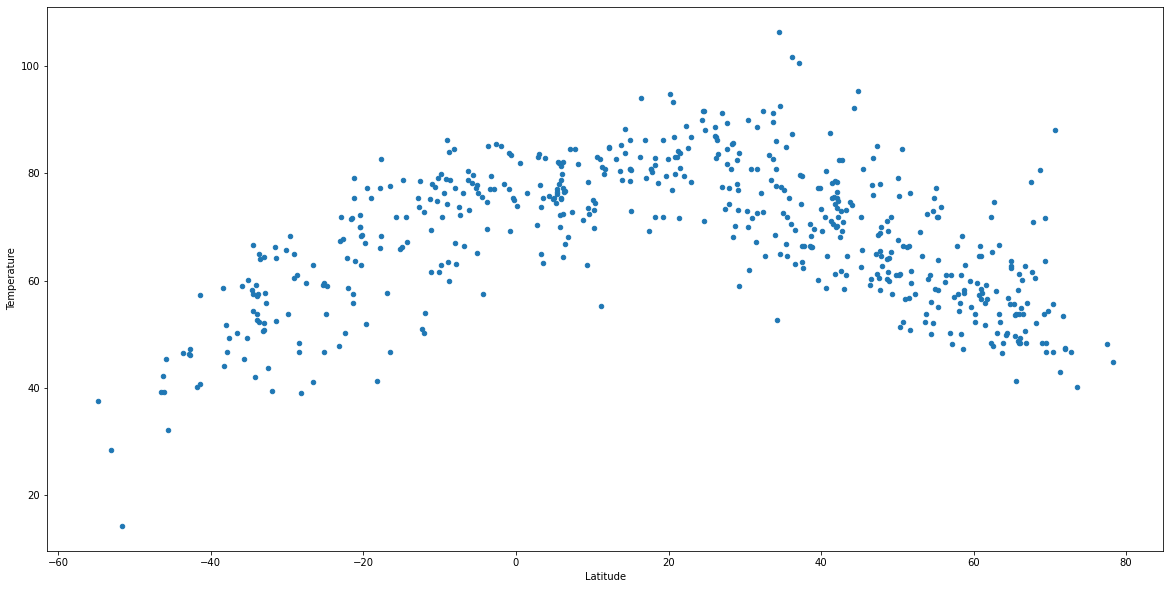

In [24]:
city_df.plot(x="Latitude", y="Temperature", kind="scatter", figsize=(20,10))
plt.show()

## Latitude vs. Humidity Plot

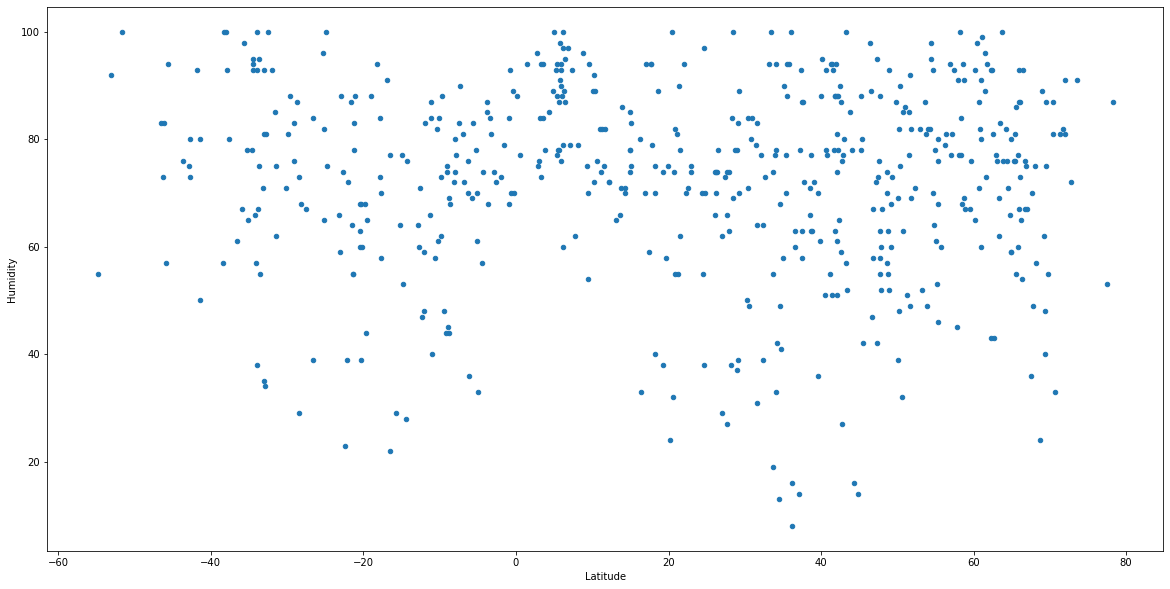

In [25]:
city_df.plot(x="Latitude", y="Humidity", kind="scatter", figsize=(20,10))
plt.show()

## Latitude vs. Cloudiness Plot

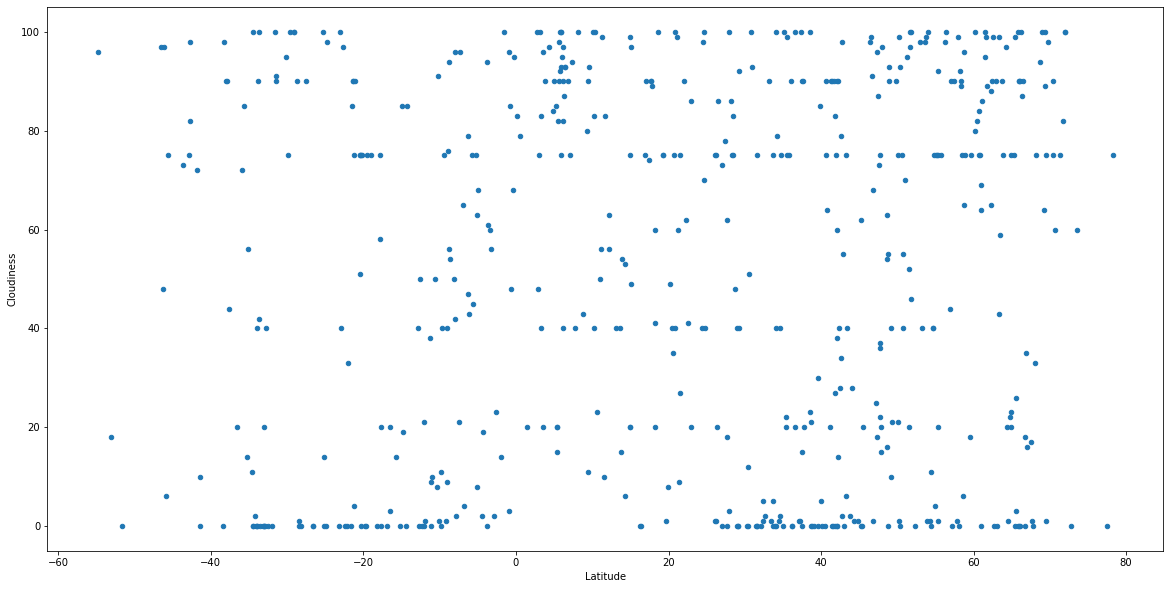

In [26]:
city_df.plot(x="Latitude", y="Cloudiness", kind="scatter", figsize=(20,10))
plt.show()

## Latitude vs. Wind Speed Plot

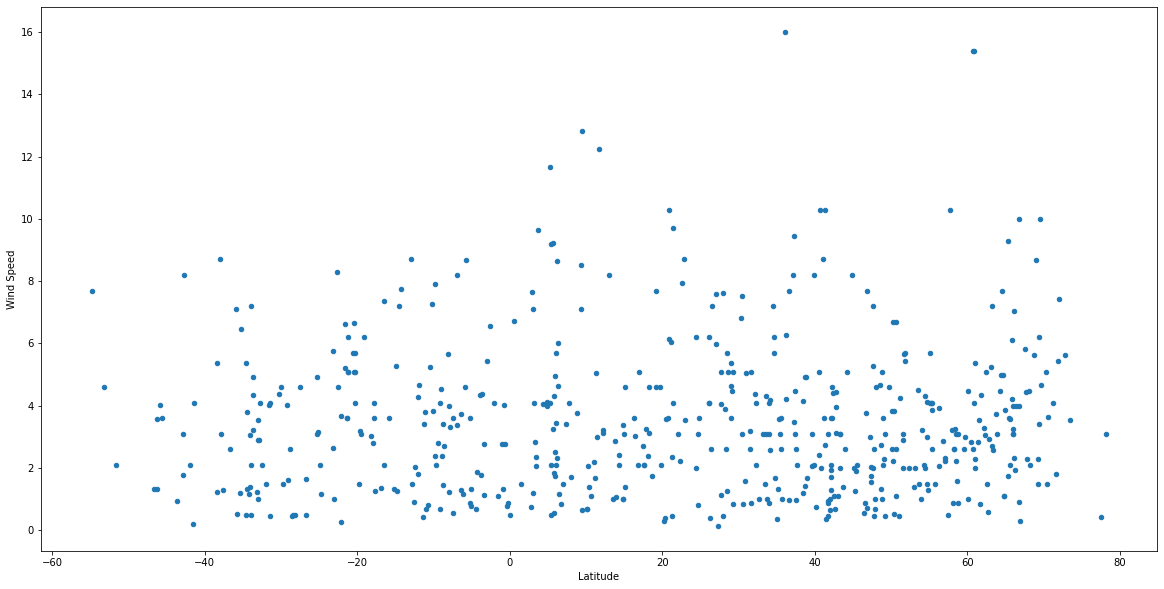

In [27]:
city_df.plot(x="Latitude", y="Wind Speed", kind="scatter", figsize=(20,10))
plt.show()

## Linear Regression

In [82]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_data(x, y, xlabel='', ylabel=''):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, (min(x)+5, min(y)+5), fontsize=15, color="red")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()

In [63]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_df[city_df["Latitude"] >= 0]
northern_df = northern_df.astype({"Humidity" : "int64", "Cloudiness" : "int64"})
northern_df.head(10)

,City,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
3,nikolskoye,30.79,59.70,55.058,76,75,3.00
4,fort nelson,-122.70,58.81,62.870,67,75,3.10
7,miraflores,-98.81,19.22,71.816,38,75,4.60
8,victoria,114.16,22.29,88.808,70,62,2.24
9,qaanaaq,-69.36,77.48,48.218,53,0,0.44
11,kimry,37.35,56.87,50.270,94,44,2.86
13,khatanga,102.50,71.97,47.318,81,100,7.42
15,colares,-9.45,38.80,66.254,63,0,4.92
17,taunton,-3.10,51.02,56.624,86,70,0.45
18,saint george,-113.58,37.10,100.616,14,1,8.20


In [64]:
# Create Northern and Southern Hemisphere DataFrames
southern_df = city_df[city_df["Latitude"] < 0]
southern_df = southern_df.astype({"Humidity" : 'int64', "Cloudiness" : "int64"})
southern_df.head(10)

,City,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,kamina,24.99,-8.74,59.990,44,56,1.46
1,bluff,168.33,-46.60,39.272,83,97,1.34
2,rikitea,-134.97,-23.12,67.352,59,100,5.76
5,cape town,18.42,-33.93,52.736,93,0,0.50
6,busselton,115.33,-33.65,52.268,75,42,4.92
10,mataura,168.86,-46.19,39.272,83,97,1.34
12,vaini,-175.20,-21.20,75.470,78,75,5.10
14,vilhena,-60.15,-12.74,73.670,60,0,1.50
16,maumere,122.21,-8.62,78.800,68,54,2.72
19,bambous virieux,57.76,-20.34,68.270,68,75,5.10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

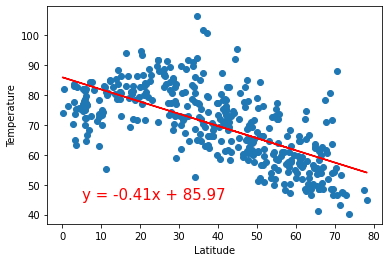

In [83]:
plot_data(northern_df["Latitude"], northern_df["Temperature"], "Latitude", "Temperature")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

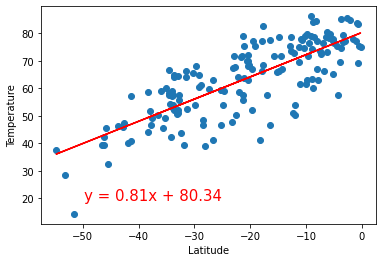

In [84]:
plot_data(southern_df["Latitude"], southern_df["Temperature"], "Latitude", "Temperature")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

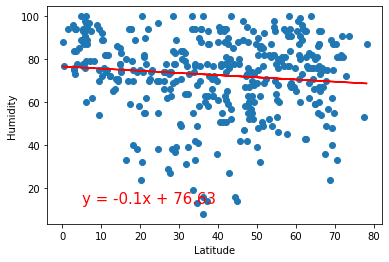

In [85]:
plot_data(northern_df["Latitude"], northern_df["Humidity"], "Latitude", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

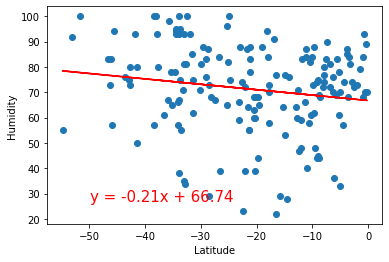

In [86]:
plot_data(southern_df["Latitude"], southern_df["Humidity"], "Latitude", "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

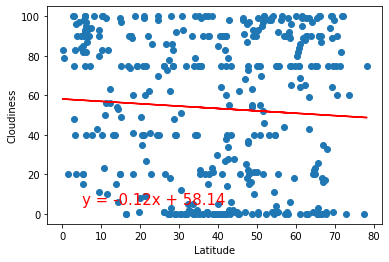

In [87]:
plot_data(northern_df["Latitude"], northern_df["Cloudiness"], "Latitude", "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

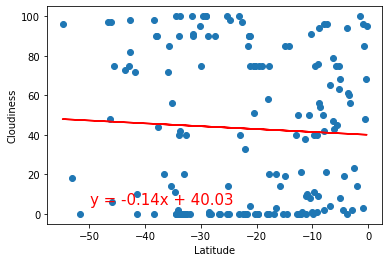

In [88]:
plot_data(southern_df["Latitude"], southern_df["Cloudiness"], "Latitude", "Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

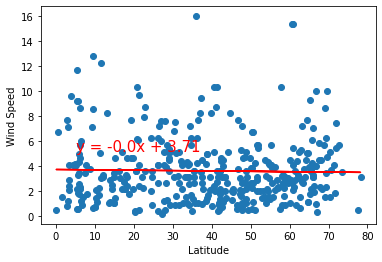

In [89]:
plot_data(northern_df["Latitude"], northern_df["Wind Speed"], "Latitude", "Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

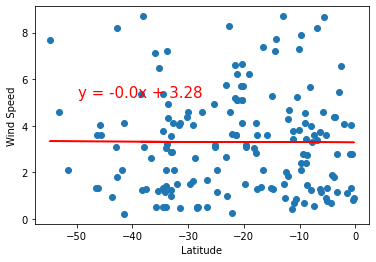

In [90]:
plot_data(southern_df["Latitude"], southern_df["Wind Speed"], "Latitude", "Wind Speed")